# Open AI tools and customization

---

## Part 1 — Hugging Face

---

### What is Hugging Face 🤗?

* ML/AI open-source Ecosystem
  * platform, tools, and community
* Hub/Repository for open:
  * pre-trained *models* and
  * ML/AI ready *datasets*
  * demo *apps*

  for various **tasks**
* Offers *libraries* for interacting with the Hub

### What are tasks?

**Tasks** describe the “shape” of each model’s API (inputs and outputs).


<p align="center"><img src="https://drive.google.com/uc?export=view&id=1xDAws-cwDVqPWVYkyaValKv896Hf1J88" alt="diagram" width="400"/></p>
<p align="center"><sub><i>Image source: Hugging Face Docs</i></sub></p>

* **image classification**
  * input image -> vector of one score per class -> argmax = class
* **image segmentation**
  * input image -> per-pixel class score -> per-pixel argmax = class masks

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1_LxbwlGyqSPx6laM2LqCLdaLWk_jUkDn" align="center" alt="diagram" width="400"/></p>
<p align="center"><sub><i>Image source: ChatGPT generated</i></sub></p>


---

## Part 2 — HuggingFace Datasets

---

### How to interact with Hugging Face datasets?

* **Step 1** Filter datasets by task
  * image segmentation
      
      tree cover dataset 4.6k rows https://huggingface.co/datasets/restor/tcd
      
      tree cover sample 237 rows https://huggingface.co/datasets/restor/tcd-nc
* **Step 2** Explore and analize data on the Hub
  * view the dataset card
      > The dataset contains pairs of images, semantic masks and object segments (instance polygons).
      >
      >Where known, each image is also tagged with its terrestrial biome index [-1, 14].

  * run queries in the dataset studio

      https://huggingface.co/datasets/restor/tcd-nc/sql-console/zQ4yMoB

      ```
      SELECT biome_name, annotation FROM test WHERE biome = 1 LIMIT 10
      ```
      https://huggingface.co/datasets/restor/tcd-nc/sql-console/zoJd5dv
      ```
      SELECT biome_name, COUNT(*) FROM train GROUP BY biome_name
      ```
  * view the dataset files and understand what `*.parquet` files are

* **Step 3** Use `datasets` 🤗 library

### How to use the `datasets` library?

In [1]:
from datasets import load_dataset

In [2]:
"""
  Load a (small) dataset
"""
dataset = load_dataset("restor/tcd-nc")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/229M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/41.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/237 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/35 [00:00<?, ? examples/s]

In [3]:
"""
 A DatasetDict contains data splits
"""
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_rows: 237
    })
    test: Dataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_rows: 35
    })
})


In [4]:
print("Splits:", list(dataset.keys()))

Splits: ['train', 'test']


In [5]:
"""
  HuggingFace datasets library is powered by Arrow
  https://huggingface.co/docs/datasets/main/en/about_arrow
"""
type(dataset['train'])

datasets.arrow_dataset.Dataset

In [6]:
print("Features:", dataset["train"].features)

Features: {'image_id': Value('int64'), 'image': Image(mode=None, decode=True), 'height': Value('int16'), 'width': Value('int16'), 'annotation': Image(mode=None, decode=True), 'oam_id': Value('string'), 'license': Value('string'), 'biome': Value('int8'), 'crs': Value('string'), 'bounds': List(Value('float32'), length=4), 'validation_fold': Value('int8'), 'biome_name': Value('string'), 'lat': Value('float32'), 'lon': Value('float32'), 'segments': Value('string'), 'meta': Value('string'), 'coco_annotations': Value('string')}


In [7]:
dataset["train"].shape

(237, 17)

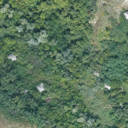

In [8]:
dataset["train"]["image"][0].resize((128, 128))

In [9]:
"""
  Stream a (big/large) dataset
  Preview and sample a dataset without downloading it all
"""
iter_dataset = load_dataset("restor/tcd", streaming=True)

README.md: 0.00B [00:00, ?B/s]

In [10]:
"""
  An IterableDatasetDict contains splits of iterable data
"""
print(iter_dataset)

IterableDatasetDict({
    train: IterableDataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_shards: 7
    })
    test: IterableDataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_shards: 1
    })
})


In [11]:
type(iter_dataset['train'])

datasets.iterable_dataset.IterableDataset

In [12]:
it = iter(iter_dataset['train'])

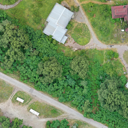

In [13]:
sample = next(it)
sample["image"].resize((128, 128))



---


### Exercise

1. Browse HuggingFace datasets by task.
2. Choose and explore a dataset in the Hub.
3. Use the `datasets` library to stream and inspect samples of the dataset.
4. Peer discussion - Do HuggingFace datasets follow the **FAIR** principles?

  * **Findable**
  * **Accessible**
  * **Interoperable**
  * **Reusable**

### Additional HuggingFace Datasets References

* https://huggingface.co/docs/datasets/main/en/index
* https://huggingface.co/docs/dataset-viewer/index
* https://huggingface.co/docs/hub/en/datasets-overview
* parquet files https://huggingface.co/docs/dataset-viewer/parquet


---

## Part 3 — HuggingFace Models

---

### How to interact with Hugging Face models?

* **Step 1** Filter models by task
  * image segmentation
      * ETH Restor tree cover https://huggingface.co/restor/tcd-segformer-mit-b0
      * Nvidia segformer https://huggingface.co/nvidia/segformer-b0-finetuned-ade-512-512

* **Step 2** Explore on the Hub
  * view the model card
      > * The model does not detect individual trees, but provides a per-pixel classification of tree/no-tree.
      >
      > * Finetuned from model: SegFormer family https://huggingface.co/models?search=nvidia/segformer
  * view the files and understand what a `*.safetensors` file is

    * **secure** unlike formats that rely on Python's pickle utility (such as .bin or .pt files), it cannot execute arbitrary code during the loading process
    * **efficient** designed to reduce model loading times:
      * Zero-copy access: it allows the application to directly map the file into memory, reducing memory overhead.
      * Lazy loading: It can load only a subset of the tensors
    * **framework and language-agnostic** stores raw numerical data and metadata that describe the model without framework-specific code
    * **compact/portable** itonly contains weights and metadata, making it easy to transfer and deploy.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1anlVBTS4ke0kbeieNKCTnRx3iDgNV4Gd" align="center" alt="diagram" width="600"/></p>
<p align="center"><sub><i>Screenshot showing a model weight viewer: 1) Tensors → layer or parameter name (hierarchical), 2) Shape → tensor dimensions (e.g., [256, 64] = 256 output channels, 64 input), 3) Precision → data type (e.g., F32 = 32-bit float, I64 = 64-bit integer). Inside the `decode_head`: 1) `batch_norm` normalization layers, 2) `linear_c` linear projection layers converting encoder feature maps to a unified embedding size, 3) `classifier` final per-pixel classification layer producing class logits. </i></sub></p>

* **Step 3** Use 🤗 model libraries: `transformers`, `difussers`


### How to use the `transformers` library?

### Additional HuggingFace Models References

* https://huggingface.co/docs/hub/en/models-the-hub
* safetensors https://huggingface.co/docs/safetensors/en/index


## Part 4 — GenAI tasks?

Running LLMs Locally (Ollama & vLLM)
(Notes and optional code snippets showing usage.)

Why is Hugging Face a Community?

Community Collaboration: As a social platform, it fosters collaboration among AI enthusiasts, researchers, and developers to share knowledge, improve models, and work together on projects.

Tools and Resources: Hugging Face provides tools, demos, documentation, and tutorials to help users learn and experiment with AI models, making it a resource for skill development in the AI field.